In [16]:
import json
from pprint import pprint
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import enki
import os

In [18]:
database = 'gaceta'

# setup the server connection
e = enki.Enki(api_key=os.environ['PYBOSSA_API_KEY'],
                                 endpoint='http://crowdcrafting.org/',
                                 project_short_name=database)
# Get all completed tasks and its associated task runs
e.get_all()

In [19]:
for task in e.tasks[0:3]:
    print 'Task id: ' + str(task.id)
    num_answers = e.task_runs_df[task.id]['info'].count()
    print 'Number of answers: ' + str(num_answers)
    times_marked_redundant = e.task_runs_df[task.id]['info'].describe().freq
    print 'Times of marked redundant: ' + str(times_marked_redundant)
    top_answer = e.task_runs_df[task.id]['info'].describe().top
    print 'Top answer: ' + str(top_answer)
    print e.tasks_df['nw_score'][task.id]
    print ''


Task id: 1415812
Number of answers: 2
Times of marked redundant: 2
Top answer: Yes
19

Task id: 1415813
Number of answers: 2
Times of marked redundant: 2
Top answer: Yes
28

Task id: 1415814
Number of answers: 2
Times of marked redundant: 2
Top answer: Yes
26



In [20]:
# seperate into 1's and 0's
redundant_nw_scores = []
not_redundant_nw_scores = []
for task in e.tasks:
    top_answer = e.task_runs_df[task.id]['info'].describe().top
    is_redundant = top_answer == 'Yes'
    if is_redundant:
        redundant_nw_scores.append(e.tasks_df['nw_score'][task.id])
    else:
        nw_score = e.tasks_df['nw_score'][task.id]
        not_redundant_nw_scores.append(nw_score)

print len(redundant_nw_scores)
print len(not_redundant_nw_scores)

17
21


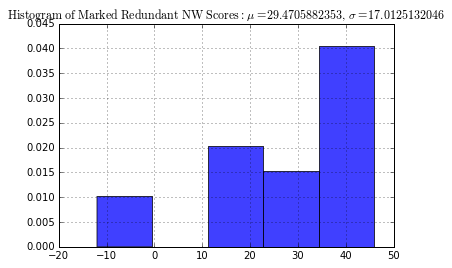

In [25]:
%matplotlib inline

# the histogram of the data
n, bins, patches = plt.hist(redundant_nw_scores, 5, normed=1, facecolor='blue', alpha=0.75)
mu_red = np.mean(redundant_nw_scores)
sigma_red = np.std(redundant_nw_scores)
plt.title(r'$\mathrm{Histogram\ of\ Marked\ Redundant\ NW\ Scores:}\ \mu=' + str(mu_red) + ',\ \sigma=' + str(sigma_red) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.grid(True)
plt.plot()
plt.savefig('marked_redundant_hist_' + database + '.png')

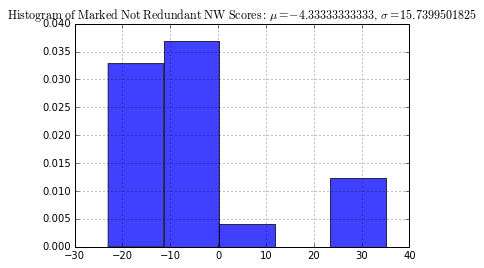

In [26]:
%matplotlib inline

# the histogram of the data
n, bins, patches = plt.hist(not_redundant_nw_scores, 5, normed=1, facecolor='blue', alpha=0.75)
mu_nr = np.mean(not_redundant_nw_scores)
sigma_nr = np.std(not_redundant_nw_scores)
plt.title(r'$\mathrm{Histogram\ of\ Marked\ Not\ Redundant\ NW\ Scores:}\ \mu='
          + str(mu_nr) + ',\ \sigma=' + str(sigma_nr) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.grid(True)
plt.plot()
plt.savefig('marked_not_redundant_hist_' + database + '.png')

In [23]:
num_sds = 1
print str(num_sds) + ' standard deviations below the mean for redundant docs: ' + str(mu_red - num_sds*sigma_red)
print str(num_sds) + ' standard deviations above the mean for not redundant docs: ' + str(mu_nr + num_sds*sigma_nr)

1 standard deviations below the mean for redundant docs: 12.4580750307
1 standard deviations above the mean for not redundant docs: 11.4066168491
